In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
df0 = pd.read_csv('Crude Oil Prices.csv', index_col='Date', parse_dates=True)

In [4]:
df = df0[['Close/Last']].copy()

In [5]:
df.reset_index(level=0, inplace=True)
df=df.sort_values(by='Date')
df=df.set_index('Date')

In [6]:
df.head()

,Close/Last
Date,
2011-08-08,81.31
2011-08-09,79.30
2011-08-10,82.89
2011-08-11,85.72
2011-08-12,85.38


In [7]:
df['LogClose/Last'] = np.log(df['Close/Last'])

/Users/mac/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
df['DiffLogClose/Last'] = df['LogClose/Last'].diff()

In [9]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [10]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose/Last']])
test_scaled = scaler.transform(test[['DiffLogClose/Last']])

In [11]:
len(train_scaled)

2194

In [12]:
type(test_scaled)

numpy.ndarray

In [13]:
df.shape

(2559, 3)

In [14]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last
Date,,,
2011-08-08,81.31,4.398269,NaN
2011-08-09,79.30,4.373238,-0.025031
2011-08-10,82.89,4.417514,0.044276
2011-08-11,85.72,4.451086,0.033572
2011-08-12,85.38,4.447112,-0.003974


In [15]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [16]:
train.shape

(2194, 3)

In [17]:
train.index[-1]

Timestamp('2020-02-26 00:00:00')

In [18]:
t = np.concatenate((train_scaled, test_scaled))

In [19]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [20]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn
Date,,,,
2011-08-08,81.31,4.398269,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010
2011-08-10,82.89,4.417514,0.044276,2.137786
2011-08-11,85.72,4.451086,0.033572,1.623651
2011-08-12,85.38,4.447112,-0.003974,-0.179671


In [21]:
df1 = df.dropna()

In [22]:
df1.shape

(2556, 4)

In [23]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 183
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2373, 183) Y.shape (2373,)


In [24]:
Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]

In [25]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [26]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [27]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)

Train on 2008 samples, validate on 365 samples
Epoch 1/600
2008/2008 [==============================] - 1s 521us/sample - loss: 4.9736 - val_loss: 0.8698
Epoch 2/600
2008/2008 [==============================] - 0s 85us/sample - loss: 2.8422 - val_loss: 0.7369
Epoch 3/600
2008/2008 [==============================] - 0s 85us/sample - loss: 2.2381 - val_loss: 0.6889
Epoch 4/600
2008/2008 [==============================] - 0s 93us/sample - loss: 1.9121 - val_loss: 0.6728
Epoch 5/600
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7122 - val_loss: 0.6700
Epoch 6/600
2008/2008 [==============================] - 0s 89us/sample - loss: 1.5550 - val_loss: 0.6702
Epoch 7/600
2008/2008 [==============================] - 0s 94us/sample - loss: 1.4284 - val_loss: 0.6783
Epoch 8/600
2008/2008 [==============================] - 0s 94us/sample - loss: 1.3137 - val_loss: 0.6852
Epoch 9/600
2008/2008 [==============================] - 0s 91us/sample - loss: 1.2138 - val_loss: 0.69

2008/2008 [==============================] - 0s 89us/sample - loss: 0.1277 - val_loss: 0.9991
Epoch 78/600
2008/2008 [==============================] - 0s 89us/sample - loss: 0.1256 - val_loss: 0.9921
Epoch 79/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.1245 - val_loss: 0.9991
Epoch 80/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.1247 - val_loss: 1.0009
Epoch 81/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.1024 - val_loss: 0.9999
Epoch 82/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0916 - val_loss: 0.9859
Epoch 83/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0975 - val_loss: 1.0061
Epoch 84/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0974 - val_loss: 1.0055
Epoch 85/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0998 - val_loss: 0.9897
Epoch 86/600
2008/2008 [==========================

2008/2008 [==============================] - 0s 102us/sample - loss: 0.0697 - val_loss: 1.0085
Epoch 154/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0720 - val_loss: 0.9895
Epoch 155/600
2008/2008 [==============================] - 0s 93us/sample - loss: 0.0797 - val_loss: 1.0105
Epoch 156/600
2008/2008 [==============================] - 0s 95us/sample - loss: 0.0937 - val_loss: 0.9864
Epoch 157/600
2008/2008 [==============================] - 0s 103us/sample - loss: 0.0902 - val_loss: 1.0163
Epoch 158/600
2008/2008 [==============================] - 0s 100us/sample - loss: 0.0902 - val_loss: 0.9597
Epoch 159/600
2008/2008 [==============================] - 0s 99us/sample - loss: 0.0826 - val_loss: 1.0124
Epoch 160/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0758 - val_loss: 0.9708
Epoch 161/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0802 - val_loss: 0.9891
Epoch 162/600
2008/2008 [==============

2008/2008 [==============================] - 0s 91us/sample - loss: 0.0454 - val_loss: 0.9799
Epoch 229/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0423 - val_loss: 0.9895
Epoch 230/600
2008/2008 [==============================] - 0s 94us/sample - loss: 0.0391 - val_loss: 0.9831
Epoch 231/600
2008/2008 [==============================] - 0s 94us/sample - loss: 0.0401 - val_loss: 0.9821
Epoch 232/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0430 - val_loss: 0.9784
Epoch 233/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0507 - val_loss: 0.9853
Epoch 234/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0471 - val_loss: 0.9803
Epoch 235/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0480 - val_loss: 0.9897
Epoch 236/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0578 - val_loss: 0.9760
Epoch 237/600
2008/2008 [=================

2008/2008 [==============================] - 0s 154us/sample - loss: 0.0638 - val_loss: 0.9580
Epoch 304/600
2008/2008 [==============================] - 0s 102us/sample - loss: 0.0558 - val_loss: 0.9575
Epoch 305/600
2008/2008 [==============================] - 0s 97us/sample - loss: 0.0416 - val_loss: 0.9520
Epoch 306/600
2008/2008 [==============================] - 0s 106us/sample - loss: 0.0388 - val_loss: 0.9806
Epoch 307/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0388 - val_loss: 0.9541
Epoch 308/600
2008/2008 [==============================] - 0s 95us/sample - loss: 0.0359 - val_loss: 0.9792
Epoch 309/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0331 - val_loss: 0.9668
Epoch 310/600
2008/2008 [==============================] - 0s 100us/sample - loss: 0.0350 - val_loss: 0.9758
Epoch 311/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0336 - val_loss: 0.9603
Epoch 312/600
2008/2008 [=============

Epoch 379/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0304 - val_loss: 0.9522
Epoch 380/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0288 - val_loss: 0.9624
Epoch 381/600
2008/2008 [==============================] - 0s 92us/sample - loss: 0.0331 - val_loss: 0.9685
Epoch 382/600
2008/2008 [==============================] - 0s 92us/sample - loss: 0.0324 - val_loss: 0.9484
Epoch 383/600
2008/2008 [==============================] - 0s 92us/sample - loss: 0.0394 - val_loss: 0.9651
Epoch 384/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0369 - val_loss: 0.9567
Epoch 385/600
2008/2008 [==============================] - 0s 94us/sample - loss: 0.0415 - val_loss: 0.9671
Epoch 386/600
2008/2008 [==============================] - 0s 93us/sample - loss: 0.0581 - val_loss: 0.9524
Epoch 387/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0636 - val_loss: 0.9638
Epoch 388/600
2008/2008 [===

Epoch 455/600
2008/2008 [==============================] - 0s 98us/sample - loss: 0.0302 - val_loss: 0.9578
Epoch 456/600
2008/2008 [==============================] - 0s 97us/sample - loss: 0.0309 - val_loss: 0.9527
Epoch 457/600
2008/2008 [==============================] - 0s 98us/sample - loss: 0.0332 - val_loss: 0.9562
Epoch 458/600
2008/2008 [==============================] - 0s 98us/sample - loss: 0.0359 - val_loss: 0.9517
Epoch 459/600
2008/2008 [==============================] - 0s 97us/sample - loss: 0.0402 - val_loss: 0.9622
Epoch 460/600
2008/2008 [==============================] - 0s 98us/sample - loss: 0.0414 - val_loss: 0.9463
Epoch 461/600
2008/2008 [==============================] - 0s 97us/sample - loss: 0.0408 - val_loss: 0.9446
Epoch 462/600
2008/2008 [==============================] - 0s 97us/sample - loss: 0.0413 - val_loss: 0.9536
Epoch 463/600
2008/2008 [==============================] - 0s 98us/sample - loss: 0.0423 - val_loss: 0.9497
Epoch 464/600
2008/2008 [===

Epoch 531/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0300 - val_loss: 0.9550
Epoch 532/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0299 - val_loss: 0.9410
Epoch 533/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0280 - val_loss: 0.9597
Epoch 534/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0282 - val_loss: 0.9378
Epoch 535/600
2008/2008 [==============================] - 0s 90us/sample - loss: 0.0303 - val_loss: 0.9577
Epoch 536/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0318 - val_loss: 0.9458
Epoch 537/600
2008/2008 [==============================] - 0s 96us/sample - loss: 0.0297 - val_loss: 0.9440
Epoch 538/600
2008/2008 [==============================] - 0s 100us/sample - loss: 0.0312 - val_loss: 0.9387
Epoch 539/600
2008/2008 [==============================] - 0s 91us/sample - loss: 0.0320 - val_loss: 0.9465
Epoch 540/600
2008/2008 [==

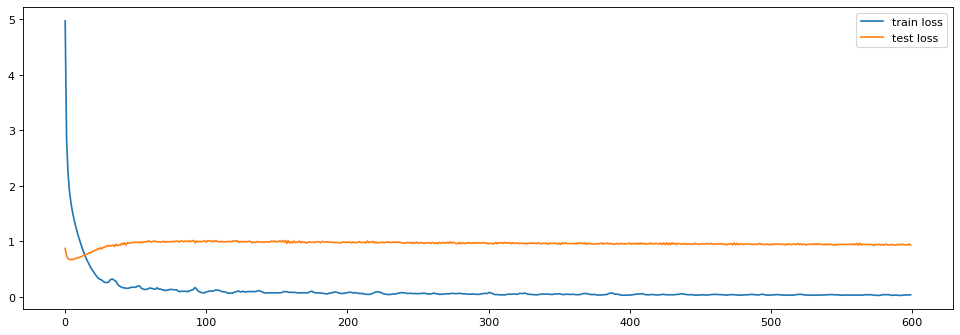

In [28]:
figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')



In [29]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [30]:
train_idx

array([False, False, False, ..., False, False, False])

In [31]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [32]:
len(Ptrain)

2008

In [33]:
Ptrain= np.concatenate(([np.nan, np.nan], Ptrain))

In [34]:
df.shape

(2559, 4)

In [35]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,])

In [36]:
P = np.concatenate(( Ptrain,[0,0], Ptest, a))

In [37]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [38]:
df.head(30)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction
Date,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN


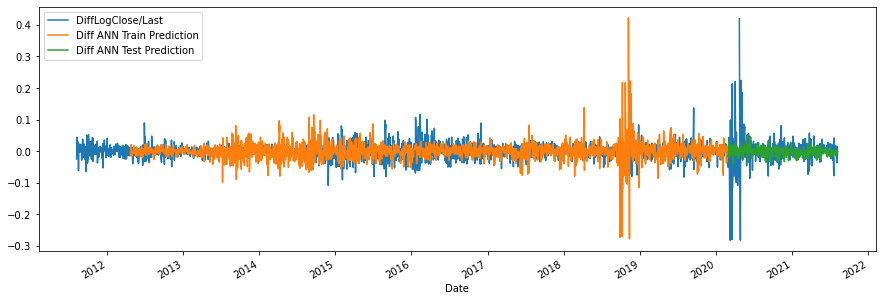

In [39]:
cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [40]:
# Needed to compute un-differenced predictions
df['ShiftLogClose/Last'] = df['LogClose/Last'].shift(1)
prev = df['ShiftLogClose/Last']
df

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last
Date,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086
...,...,...,...,...,...,...,...
2021-08-02,71.26,4.266335,-0.037054,-1.768478,NaN,-0.002557,4.303389
2021-08-03,70.56,4.256463,-0.009872,-0.462923,NaN,0.001979,4.266335
2021-08-04,68.15,4.221711,-0.034752,-1.657924,NaN,0.000434,4.256463


In [41]:
# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']

In [42]:
# prev[train_idx] + Ptrain

In [43]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

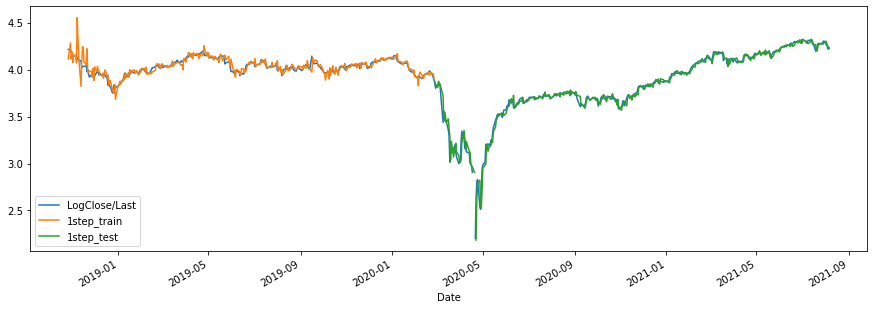

In [44]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [45]:
# prev[test_idx] + np.concatenate((Ptrain, [0,0,0,0,0,0,0,0,0,0,0,0]))

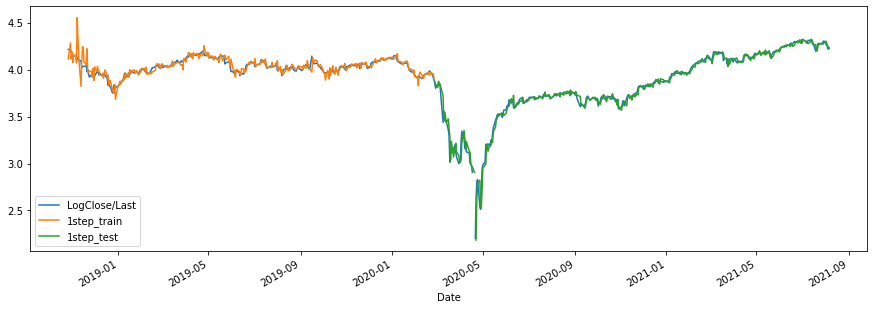

In [46]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [47]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [48]:
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [49]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

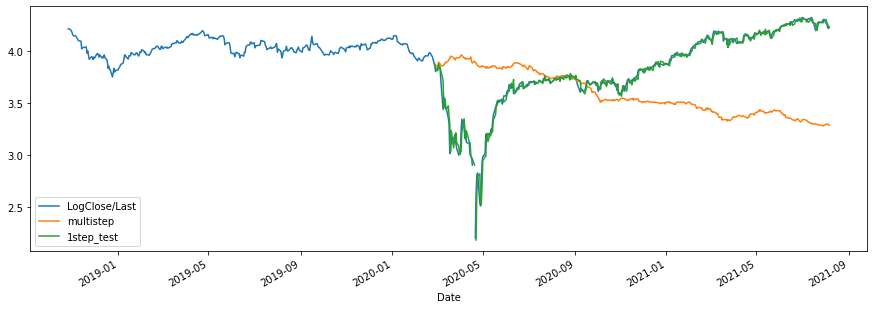

In [50]:
# plot 1-step and multi-step forecast
df.iloc[-700:][['LogClose/Last', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [51]:
# test_log_pass = df.iloc[-Ntest:]['LogClose/Last']
# mape1 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multistep'])
# print("multi-step MAPE:", mape1)
# mape2 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multioutput'])
# print("multi-output MAPE:", mape2)

In [52]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2009, 183) Y.shape (2009, 365)


In [53]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [54]:
 #Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [55]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [56]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=700,
  validation_data=(Xtest_m, Ytest_m)
)

Train on 2008 samples, validate on 1 samples
Epoch 1/700
2008/2008 [==============================] - 1s 368us/sample - loss: 2.0085 - val_loss: 6.5074
Epoch 2/700
2008/2008 [==============================] - 0s 133us/sample - loss: 1.9579 - val_loss: 6.4468
Epoch 3/700
2008/2008 [==============================] - 0s 110us/sample - loss: 1.9374 - val_loss: 6.4098
Epoch 4/700
2008/2008 [==============================] - 0s 96us/sample - loss: 1.9251 - val_loss: 6.3773
Epoch 5/700
2008/2008 [==============================] - 0s 94us/sample - loss: 1.9167 - val_loss: 6.3607
Epoch 6/700
2008/2008 [==============================] - 0s 94us/sample - loss: 1.9103 - val_loss: 6.3439
Epoch 7/700
2008/2008 [==============================] - 0s 95us/sample - loss: 1.9048 - val_loss: 6.3279
Epoch 8/700
2008/2008 [==============================] - 0s 98us/sample - loss: 1.8999 - val_loss: 6.3111
Epoch 9/700
2008/2008 [==============================] - 0s 93us/sample - loss: 1.8952 - val_loss: 6.298

Epoch 77/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.8144 - val_loss: 6.5131
Epoch 78/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.8140 - val_loss: 6.5262
Epoch 79/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.8138 - val_loss: 6.5189
Epoch 80/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.8132 - val_loss: 6.5363
Epoch 81/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.8127 - val_loss: 6.5468
Epoch 82/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.8124 - val_loss: 6.5415
Epoch 83/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.8120 - val_loss: 6.5513
Epoch 84/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.8113 - val_loss: 6.5516
Epoch 85/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.8109 - val_loss: 6.5633
Epoch 86/700
2008/2008 [====

2008/2008 [==============================] - 0s 105us/sample - loss: 1.7863 - val_loss: 6.7313
Epoch 153/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.7858 - val_loss: 6.7515
Epoch 154/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7855 - val_loss: 6.7483
Epoch 155/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7853 - val_loss: 6.7379
Epoch 156/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7851 - val_loss: 6.7465
Epoch 157/700
2008/2008 [==============================] - 0s 109us/sample - loss: 1.7846 - val_loss: 6.7466
Epoch 158/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7843 - val_loss: 6.7398
Epoch 159/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7841 - val_loss: 6.7456
Epoch 160/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7837 - val_loss: 6.7490
Epoch 161/700
2008/2008 [========

2008/2008 [==============================] - 0s 106us/sample - loss: 1.7684 - val_loss: 6.9173
Epoch 228/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7682 - val_loss: 6.9266
Epoch 229/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7681 - val_loss: 6.9323
Epoch 230/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7679 - val_loss: 6.9401
Epoch 231/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7677 - val_loss: 6.9292
Epoch 232/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.7674 - val_loss: 6.9321
Epoch 233/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7673 - val_loss: 6.9373
Epoch 234/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7672 - val_loss: 6.9428
Epoch 235/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7671 - val_loss: 6.9561
Epoch 236/700
2008/2008 [========

2008/2008 [==============================] - 0s 107us/sample - loss: 1.7576 - val_loss: 7.0832
Epoch 303/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7576 - val_loss: 7.0815
Epoch 304/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7574 - val_loss: 7.0825
Epoch 305/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7573 - val_loss: 7.0746
Epoch 306/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7571 - val_loss: 7.0860
Epoch 307/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7570 - val_loss: 7.0749
Epoch 308/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7569 - val_loss: 7.0758
Epoch 309/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7569 - val_loss: 7.0801
Epoch 310/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7568 - val_loss: 7.0784
Epoch 311/700
2008/2008 [========

2008/2008 [==============================] - 0s 106us/sample - loss: 1.7511 - val_loss: 7.2353
Epoch 378/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7509 - val_loss: 7.2374
Epoch 379/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.7508 - val_loss: 7.2246
Epoch 380/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.7509 - val_loss: 7.2310
Epoch 381/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7509 - val_loss: 7.2027
Epoch 382/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7507 - val_loss: 7.2260
Epoch 383/700
2008/2008 [==============================] - 0s 100us/sample - loss: 1.7506 - val_loss: 7.2439
Epoch 384/700
2008/2008 [==============================] - 0s 103us/sample - loss: 1.7506 - val_loss: 7.2194
Epoch 385/700
2008/2008 [==============================] - 0s 101us/sample - loss: 1.7504 - val_loss: 7.2439
Epoch 386/700
2008/2008 [========

2008/2008 [==============================] - 0s 108us/sample - loss: 1.7465 - val_loss: 7.6592
Epoch 453/700
2008/2008 [==============================] - 0s 111us/sample - loss: 1.7464 - val_loss: 7.6304
Epoch 454/700
2008/2008 [==============================] - 0s 121us/sample - loss: 1.7465 - val_loss: 7.6514
Epoch 455/700
2008/2008 [==============================] - 0s 112us/sample - loss: 1.7463 - val_loss: 7.6751
Epoch 456/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.7464 - val_loss: 7.7116
Epoch 457/700
2008/2008 [==============================] - 0s 111us/sample - loss: 1.7463 - val_loss: 7.6975
Epoch 458/700
2008/2008 [==============================] - 0s 113us/sample - loss: 1.7463 - val_loss: 7.7104
Epoch 459/700
2008/2008 [==============================] - 0s 117us/sample - loss: 1.7462 - val_loss: 7.7002
Epoch 460/700
2008/2008 [==============================] - 0s 123us/sample - loss: 1.7460 - val_loss: 7.7162
Epoch 461/700
2008/2008 [========

2008/2008 [==============================] - 0s 105us/sample - loss: 1.7433 - val_loss: 8.1079
Epoch 528/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7434 - val_loss: 8.1370
Epoch 529/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7434 - val_loss: 8.1009
Epoch 530/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.7432 - val_loss: 8.1444
Epoch 531/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.7432 - val_loss: 8.1480
Epoch 532/700
2008/2008 [==============================] - 0s 108us/sample - loss: 1.7431 - val_loss: 8.1125
Epoch 533/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7432 - val_loss: 8.1707
Epoch 534/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7432 - val_loss: 8.1854
Epoch 535/700
2008/2008 [==============================] - 0s 107us/sample - loss: 1.7431 - val_loss: 8.1679
Epoch 536/700
2008/2008 [========

2008/2008 [==============================] - 0s 104us/sample - loss: 1.7411 - val_loss: 8.5961
Epoch 603/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7410 - val_loss: 8.6171
Epoch 604/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7410 - val_loss: 8.5877
Epoch 605/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7410 - val_loss: 8.6220
Epoch 606/700
2008/2008 [==============================] - 0s 106us/sample - loss: 1.7409 - val_loss: 8.6299
Epoch 607/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7409 - val_loss: 8.6197
Epoch 608/700
2008/2008 [==============================] - 0s 103us/sample - loss: 1.7410 - val_loss: 8.6060
Epoch 609/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7410 - val_loss: 8.6019
Epoch 610/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7410 - val_loss: 8.5960
Epoch 611/700
2008/2008 [========

2008/2008 [==============================] - 0s 106us/sample - loss: 1.7397 - val_loss: 8.9751
Epoch 678/700
2008/2008 [==============================] - 0s 103us/sample - loss: 1.7397 - val_loss: 8.9544
Epoch 679/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7397 - val_loss: 8.9306
Epoch 680/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7396 - val_loss: 8.9621
Epoch 681/700
2008/2008 [==============================] - 0s 104us/sample - loss: 1.7396 - val_loss: 8.9398
Epoch 682/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7396 - val_loss: 9.0137
Epoch 683/700
2008/2008 [==============================] - 0s 105us/sample - loss: 1.7395 - val_loss: 9.0023
Epoch 684/700
2008/2008 [==============================] - 0s 100us/sample - loss: 1.7396 - val_loss: 9.0404
Epoch 685/700
2008/2008 [==============================] - 0s 100us/sample - loss: 1.7395 - val_loss: 9.0601
Epoch 686/700
2008/2008 [========

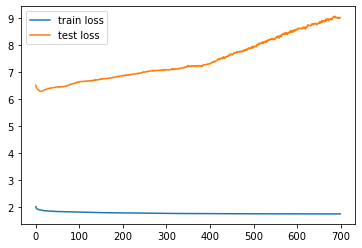

In [57]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [58]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [59]:
Ptrain.shape, Ptest.shape

((2008, 365), (365, 365))

In [60]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [61]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [62]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

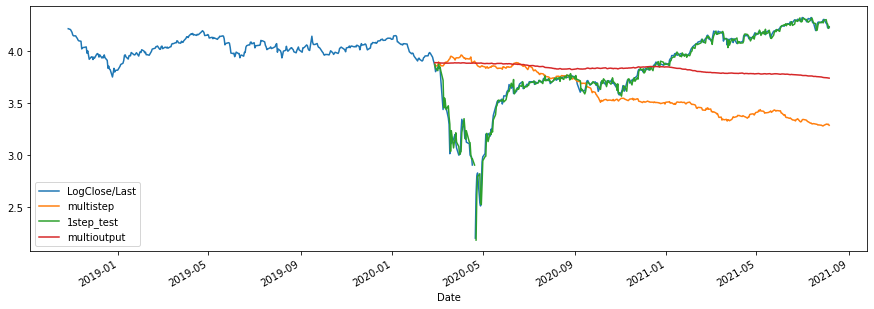

In [63]:
# plot all forecasts
cols = ['LogClose/Last', 'multistep', '1step_test', 'multioutput']
df.iloc[-700:][cols].plot(figsize=(15, 5));

In [64]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose/Last'].notna()

mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)
# mape0 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, '1step_test'])
# print("1step_test MAPE:", mape0)

multi-step MAPE: 48151443173075.586
multi-output MAPE: 47924274704218.48


In [65]:
df.head(10)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last,1step_train,1step_test,multistep,multioutput
Date,,,,,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269,NaN,NaN,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238,NaN,NaN,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514,NaN,NaN,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086,NaN,NaN,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN,4.447112,NaN,NaN,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN,4.475972,NaN,NaN,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN,4.461877,NaN,NaN,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN,4.472553,NaN,NaN,NaN,NaN


In [66]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mspe1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mspe2)

multi-step MSPE: 6.776080102136409
multi-output MSPE: 8.010943957130443


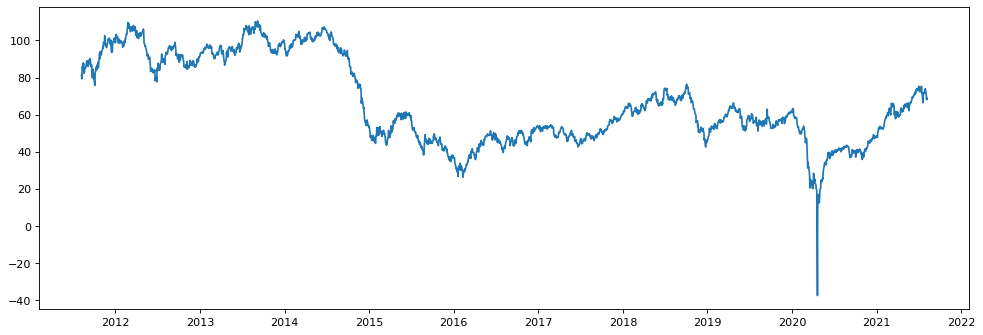

In [67]:
from matplotlib.pyplot import figure

figure(figsize=(15,5), dpi=80)
plt.plot(df.iloc[:][['Close/Last']])
plt.savefig('raw_data_plot.png')

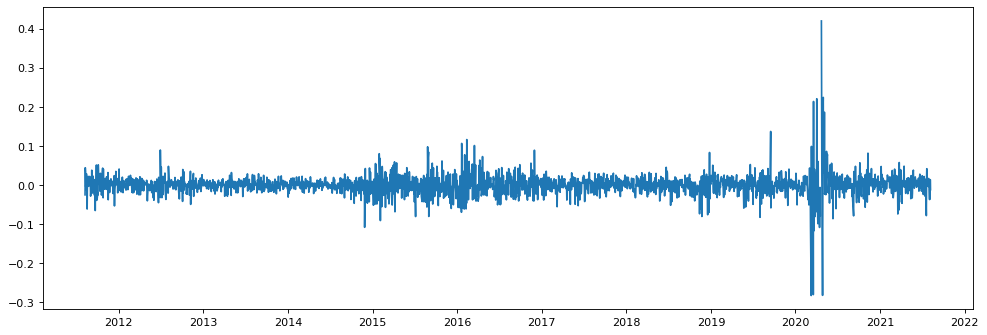

In [68]:
figure(figsize=(15,5), dpi=80)
# cols = ['DiffLogClose/Last 	']
# plt.plot(df[cols])

cols = ['DiffLogClose/Last',]
#         'Diff ANN Train Prediction',
#         'Diff ANN Test Prediction']
plt.plot(df[cols])

plt.savefig('LOGraw_data_error_plot.png')

X.shape (2546, 10) Y.shape (2546,)
Train on 2181 samples, validate on 365 samples
Epoch 1/600
2181/2181 [==============================] - 1s 296us/sample - loss: 3.1973 - val_loss: 0.8999
Epoch 2/600
2181/2181 [==============================] - 0s 67us/sample - loss: 2.3421 - val_loss: 0.8179
Epoch 3/600
2181/2181 [==============================] - 0s 65us/sample - loss: 2.0798 - val_loss: 0.8015
Epoch 4/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.9510 - val_loss: 0.7899
Epoch 5/600
2181/2181 [==============================] - 0s 63us/sample - loss: 1.8722 - val_loss: 0.7841
Epoch 6/600
2181/2181 [==============================] - 0s 65us/sample - loss: 1.8164 - val_loss: 0.7824
Epoch 7/600
2181/2181 [==============================] - 0s 64us/sample - loss: 1.7635 - val_loss: 0.7860
Epoch 8/600
2181/2181 [==============================] - 0s 64us/sample - loss: 1.7327 - val_loss: 0.7832
Epoch 9/600
2181/2181 [==============================] - 0s 60us/samp

Epoch 77/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.2520 - val_loss: 0.8078
Epoch 78/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.2554 - val_loss: 0.8060
Epoch 79/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.2483 - val_loss: 0.8019
Epoch 80/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.2467 - val_loss: 0.8031
Epoch 81/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.2439 - val_loss: 0.8026
Epoch 82/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.2399 - val_loss: 0.7995
Epoch 83/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.2371 - val_loss: 0.8015
Epoch 84/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.2346 - val_loss: 0.7989
Epoch 85/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.2294 - val_loss: 0.7997
Epoch 86/600
2181/2181 [=============

2181/2181 [==============================] - 0s 61us/sample - loss: 1.0893 - val_loss: 0.7873
Epoch 154/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.0916 - val_loss: 0.7889
Epoch 155/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0863 - val_loss: 0.7898
Epoch 156/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0893 - val_loss: 0.7889
Epoch 157/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0824 - val_loss: 0.7858
Epoch 158/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.0859 - val_loss: 0.7908
Epoch 159/600
2181/2181 [==============================] - 0s 58us/sample - loss: 1.0802 - val_loss: 0.7905
Epoch 160/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0829 - val_loss: 0.7883
Epoch 161/600
2181/2181 [==============================] - 0s 59us/sample - loss: 1.0769 - val_loss: 0.7856
Epoch 162/600
2181/2181 [=================

Epoch 229/600
2181/2181 [==============================] - 0s 62us/sample - loss: 0.9986 - val_loss: 0.7932
Epoch 230/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0016 - val_loss: 0.7929
Epoch 231/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9978 - val_loss: 0.7947
Epoch 232/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0005 - val_loss: 0.7945
Epoch 233/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9965 - val_loss: 0.7921
Epoch 234/600
2181/2181 [==============================] - 0s 61us/sample - loss: 0.9983 - val_loss: 0.7905
Epoch 235/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9938 - val_loss: 0.7948
Epoch 236/600
2181/2181 [==============================] - 0s 60us/sample - loss: 1.0007 - val_loss: 0.7885
Epoch 237/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9993 - val_loss: 0.7930
Epoch 238/600
2181/2181 [===

Epoch 305/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9521 - val_loss: 0.7986
Epoch 306/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9534 - val_loss: 0.7968
Epoch 307/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9525 - val_loss: 0.7960
Epoch 308/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9558 - val_loss: 0.8084
Epoch 309/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9625 - val_loss: 0.7931
Epoch 310/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9533 - val_loss: 0.7960
Epoch 311/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9563 - val_loss: 0.7988
Epoch 312/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9516 - val_loss: 0.7973
Epoch 313/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9594 - val_loss: 0.8039
Epoch 314/600
2181/2181 [===

Epoch 381/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9216 - val_loss: 0.8148
Epoch 382/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9244 - val_loss: 0.8222
Epoch 383/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9228 - val_loss: 0.8165
Epoch 384/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9286 - val_loss: 0.8164
Epoch 385/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9218 - val_loss: 0.8140
Epoch 386/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9231 - val_loss: 0.8116
Epoch 387/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9162 - val_loss: 0.8159
Epoch 388/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9192 - val_loss: 0.8235
Epoch 389/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9236 - val_loss: 0.8249
Epoch 390/600
2181/2181 [===

Epoch 457/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9193 - val_loss: 0.8393
Epoch 458/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.9050 - val_loss: 0.8401
Epoch 459/600
2181/2181 [==============================] - 0s 61us/sample - loss: 0.8986 - val_loss: 0.8449
Epoch 460/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.9000 - val_loss: 0.8410
Epoch 461/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8969 - val_loss: 0.8450
Epoch 462/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.8948 - val_loss: 0.8393
Epoch 463/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8954 - val_loss: 0.8289
Epoch 464/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8946 - val_loss: 0.8320
Epoch 465/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8927 - val_loss: 0.8461
Epoch 466/600
2181/2181 [===

Epoch 533/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.8766 - val_loss: 0.8474
Epoch 534/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8760 - val_loss: 0.8559
Epoch 535/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8746 - val_loss: 0.8496
Epoch 536/600
2181/2181 [==============================] - 0s 59us/sample - loss: 0.8834 - val_loss: 0.8617
Epoch 537/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8837 - val_loss: 0.8499
Epoch 538/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8803 - val_loss: 0.8507
Epoch 539/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8794 - val_loss: 0.8524
Epoch 540/600
2181/2181 [==============================] - 0s 61us/sample - loss: 0.8815 - val_loss: 0.8547
Epoch 541/600
2181/2181 [==============================] - 0s 60us/sample - loss: 0.8770 - val_loss: 0.8543
Epoch 542/600
2181/2181 [===

ValueError: shape mismatch: value array of shape (2181,) could not be broadcast to indexing result of shape (2010,)

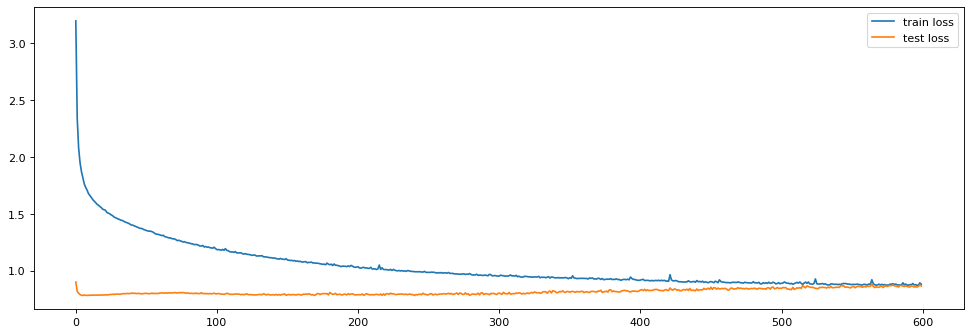

In [69]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]


# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)



model.compile(
  loss='mse',
  optimizer='adam',
)


r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)


figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')

train_idx[:T+1] = False # first T+1 values are not predictable


Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()


# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']


# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest


# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));


